# Neural Networks: Zero to Hero

Video:

https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

Reference notebook:

https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/micrograd/micrograd_lecture_first_half_roughly.ipynb

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

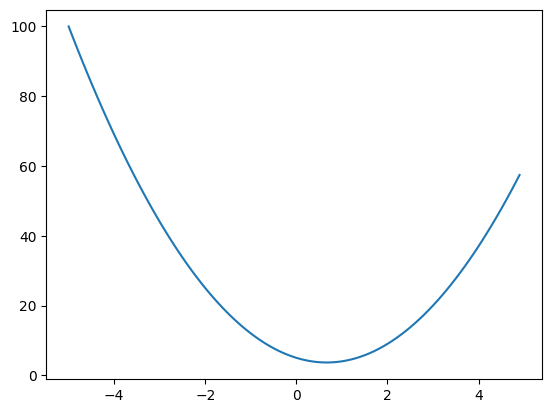

In [4]:
X = np.arange(-5, 5, 0.1)
Y = f(X)
plt.plot(X, Y)

In [5]:
h = 0.000001
x = 2/3
derivative = (f(x + h) - f(x - h)) / (2 *h)

# ~0.000
derivative

-2.220446049250313e-10

In [6]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c

# 4.0
print(d)

4.0


In [7]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

derivative_a = (d2 - d1) / h
print(f"d1: {d1}")  # 4.0
print(f"d2: {d2}")  # 3.996..
print(f"derivative_a: {derivative_a}")  # -3.000..

d1: 4.0
d2: 3.999699999999999
derivative_a: -3.000000000010772


In [8]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

derivative_b = (d2 - d1) / h
print(f"d1: {d1}")  # 4.0
print(f"d2: {d2}")  # 4.0002
print(f"derivative_b: {derivative_b}")   # 2.0000..

d1: 4.0
d2: 4.0002
derivative_b: 2.0000000000042206


In [9]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

derivative_c = (d2 - d1) / h
print(f"d1: {d1}")  # 4.0
print(f"d2: {d2}")  # 4.0001
print(f"derivative_c: {derivative_c}")  # 0.999999..

d1: 4.0
d2: 4.0001
derivative_c: 0.9999999999976694


In [10]:
class Value:
    def __init__(self, data, label="", _in=(), _op=""):
        self.data = data
        self.label = label
        self._inputs = set(_in)
        self._operation = _op
        self._grad = 0.0
    
    def __add__(self, other):
        return Value(self.data + other.data, _in=(self, other), _op="+")

    def __sub__(self, other):
        return Value(self.data - other.data, _in=(self, other), _op="-")

    def __mul__(self, other):
        return Value(self.data * other.data, _in=(self, other), _op="*")
    
    def __div__(self, other):
        return Value(self.data / other.data, _in=(self, other), _op="/")
   
    def __repr__(self):
        return f"Value({self.data})"
    

In [11]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2, label='f')
L = d * f; L.label='L'

# Value(-8.0)
print(L)

Value(-8.0)


In [12]:
from graphviz import Digraph

def build_dot_graph(root_node):
    def add_inputs(parent_node, all_nodes):
        if parent_node not in all_nodes:
            all_nodes.add(parent_node)
            for input_node in parent_node._inputs:
                add_inputs(input_node, all_nodes)

    all_nodes = set()
    add_inputs(root_node, all_nodes)

    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    for node in all_nodes:
        node_label=f'{{ {node.label} ({node._operation}) | {{ d={node.data:.4f} | g={node._grad:.4f} }}}}'

        dot.node(str(id(node)), node_label, shape="record")

        if node._inputs:
            op_node_id = str(id(node))+'_'+node._operation
            dot.node( op_node_id, label=node._operation )
            dot.edge(op_node_id, str(id(node)))
            for input_node in node._inputs:
                dot.edge(str(id(input_node)), op_node_id)
    return dot

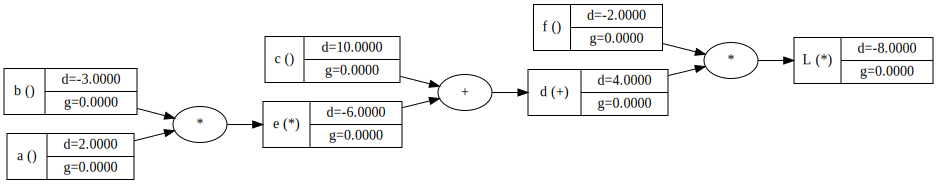

In [13]:
build_dot_graph(L)

In [14]:
# dL/dL = 1.0
L._grad = 1.0
# dL/df = 4.0  # value of d in d*f
f._grad = 4.0
# dL/dd = -2.0  # value of f in d*f
d._grad = -2.0

# dd/dc = 1.0  # addition
# dL/dc = dd/dc * dL/dd = 1.0 * -2.0 = -2.0
c._grad = -2.0

# dd/de = 1.0  # addition
# dL/de = dd/de * dL/dd = 1.0 * -2.0 = -2.0
e._grad = -2.0

# de/db = 2.0  # value of a in a*b
# dL/db = de/db * dL/de = 2.0 * -2.0 = -4.0
b._grad = -4.0

# de/da = -3.0  # value of b in a*b
# dL/da = de/da * dL/de = -3.0 * -2.0 = 6.0
a._grad = 6.0

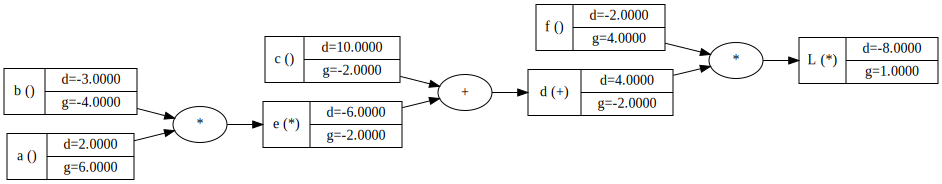

In [15]:
build_dot_graph(L)

In [16]:
def lol():
    """Numerically test gradients"""
    h = 0.00001

    a = Value(2.0 - h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, label='f')
    L = d * f; L.label='L'
    L1 = L.data

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2, label='f')
    L = d * f; L.label='L'
    L2 = L.data

    derivative = (L2-L1) / (2*h)
    print(derivative)

# 6.000000000128124
lol()

6.000000000128124


In [17]:
# Bump leaf nodes in direction of grad. L should increase
a.data += 0.01 * a._grad
b.data += 0.01 * b._grad
c.data += 0.01 * c._grad
f.data += 0.01 * f._grad

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
L = d * f; L.label='L'

# Value(-7.286496)
print(L)

Value(-7.286496)


# Part 1b: Neuron

In [19]:
class Value:
    def __init__(self, data, label="", _in=(), _op=""):
        self.data = data
        self.label = label
        self._inputs = list(_in)
        self._operation = _op
        self._grad = 0.0
        self._backward = lambda: None
    
    def __add__(self, other):
        res = Value(data=self.data+other.data, _in=(self, other), _op="+")
        def backward():
            self._grad += 1.0 * res._grad
            other._grad += 1.0 * res._grad
        res._backward = backward
        return res
        
    def __sub__(self, other):
        res = Value(data=self.data-other.data, _in=(self, other), _op="-")
        def backward():
            self._grad += 1.0 * res._grad
            other._grad += -1.0 * res._grad
        res._backward = backward
        return res

    def __mul__(self, other):
        res = Value(data=self.data*other.data, _in=(self, other), _op="*")
        def backward():
            self._grad += other.data * res._grad
            other._grad += self.data * res._grad
        res._backward = backward
        return res
    
    def __truediv__(self, other):
        res = Value(data=self.data/other.data, _in=(self, other), _op="/")
        def backward():
            self._grad += (1.0 / other.data) * res._grad
            other._grad += (-self.data / other.data**2) * res._grad
        res._backward = backward
        return res
    
    def tanh(self):
        x = self.data
        o = (math.exp(2*x) - 1.0) / (math.exp(2*x) + 1)
        res = Value(o, _in=(self,), _op="tanh")
        def backward():
            self._grad += (1.0 - res.data**2) * res._grad
        res._backward = backward
        return res
    
    def __repr__(self):
        return f"Value(l={self.label} d={self.data:.4f}, g={self._grad:.4f})"
    
    def print_topo(self):
        # Topological sort
        topo = []
        visited = set()
        def build(v):
            if v not in visited:
                visited.add(v)
                for inp in v._inputs:
                    build(inp)
                topo.append(v)
        build(self)

        for node in reversed(topo):
            print(node)

    
    def backward(self):
        # Topological sort
        topo = []
        visited = set()
        def build(v):
            if v not in visited:
                visited.add(v)
                for inp in v._inputs:
                    build(inp)
                topo.append(v)
        build(self)
        
        self._grad = 1.0
        for node in reversed(topo):
            node._backward()
    

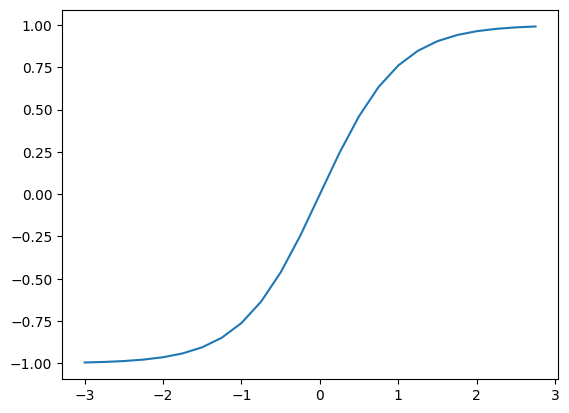

In [20]:
# Confirm our tanh looks ok
X = np.arange(-3, 3, 0.25)
Y = np.array([Value(x).tanh().data for x in X])
plt.plot(X, Y)

In [21]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# Forward pass
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [22]:
# d_o/d_o = 1.0
o._grad = 1.0
# d_o/d_n = 1 - tanh(n)**2 = 1 - o**2
print( 1.0 - o.data**2 )  # 0.49999
n._grad = 0.5
# d_n/d_b = 1.0  # addition
# d_o/d_b = dn/db * do/dn = 1.0 * 0.5 = 0.5
b._grad = 0.5
# d_o/d_x1w1x2w2 = 1.0 * 0.5 = 0.5  # chain rule through addition
x1w1x2w2._grad = 0.5
# d_o/d_x1w1 = 1.0 * 0.5 = 0.5  # chain rule through addition
x1w1._grad = 0.5
x2w2._grad = 0.5

# d_x1w1/d_x1 = -3.0  # value of w1 in x1*w1
# d_o/d_x1 = -1.5  # chain rule with 0.5
print(f"x1._grad = {w1.data} * {x1w1._grad} = {w1.data * x1w1._grad}")
x1._grad = -1.5

# d_x1w1/d_w1 = 2.0  # value of x1 in x1*w1
# d_o/d_w1 = 1.0  # chain rule with 0.5
print(f"w1._grad = {x1.data} * {x1w1._grad} = {x1.data * x1w1._grad}")
w1._grad = 1.0

# d_o/d_x2 = 1.0 * 0.5  # value of w2 * 0.5 through chain rule
print(f"x2._grad = {w2.data} * {x2w2._grad} = {w2.data * x2w2._grad}")
x2._grad = 0.5

# d_o/d_w2 = 0.0 * 0.5  # value of x2 * 0.5 through chain rule
print(f"w2._grad = {x2.data} * {x2w2._grad} = {x2.data * x2w2._grad}")
w2._grad = 0.0


0.4999999999999999
x1._grad = -3.0 * 0.5 = -1.5
w1._grad = 2.0 * 0.5 = 1.0
x2._grad = 1.0 * 0.5 = 0.5
w2._grad = 0.0 * 0.5 = 0.0


Value(l=o d=0.7071, g=1.0000)
Value(l=n d=0.8814, g=0.5000)
Value(l=b d=6.8814, g=0.5000)
Value(l=x1w1x2w2 d=-6.0000, g=0.5000)
Value(l=x2w2 d=0.0000, g=0.5000)
Value(l=w2 d=1.0000, g=0.0000)
Value(l=x2 d=0.0000, g=0.5000)
Value(l=x1w1 d=-6.0000, g=0.5000)
Value(l=w1 d=-3.0000, g=1.0000)
Value(l=x1 d=2.0000, g=-1.5000)


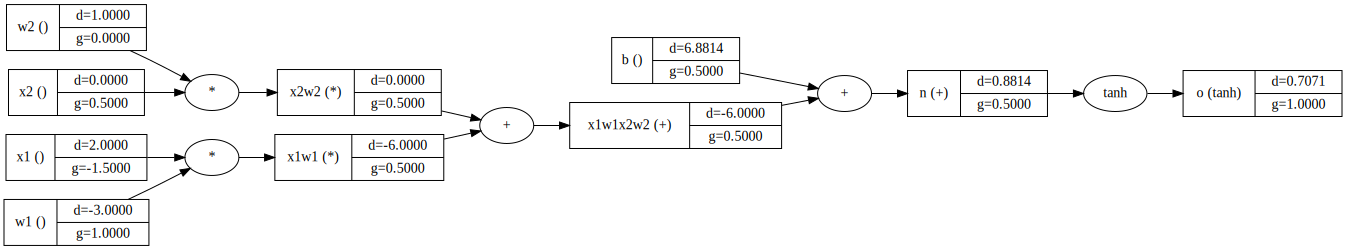

In [23]:
# Value(l=o d=0.7071, g=1.0000)
# Value(l=n d=0.8814, g=0.5000)
# Value(l=b d=6.8814, g=0.5000)
# Value(l=x1w1x2w2 d=-6.0000, g=0.5000)
# Value(l=x2w2 d=0.0000, g=0.5000)
# Value(l=w2 d=1.0000, g=0.0000)
# Value(l=x2 d=0.0000, g=0.5000)
# Value(l=x1w1 d=-6.0000, g=0.5000)
# Value(l=w1 d=-3.0000, g=1.0000)
# Value(l=x1 d=2.0000, g=-1.5000)
o.print_topo()

build_dot_graph(o)

In [24]:
# Inputs
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# Bias
b = Value(6.8813735870195432, label='b')
# Forward pass
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

Value(l=o d=0.7071, g=1.0000)
Value(l=n d=0.8814, g=0.5000)
Value(l=b d=6.8814, g=0.5000)
Value(l=x1w1x2w2 d=-6.0000, g=0.5000)
Value(l=x2w2 d=0.0000, g=0.5000)
Value(l=w2 d=1.0000, g=0.0000)
Value(l=x2 d=0.0000, g=0.5000)
Value(l=x1w1 d=-6.0000, g=0.5000)
Value(l=w1 d=-3.0000, g=1.0000)
Value(l=x1 d=2.0000, g=-1.5000)


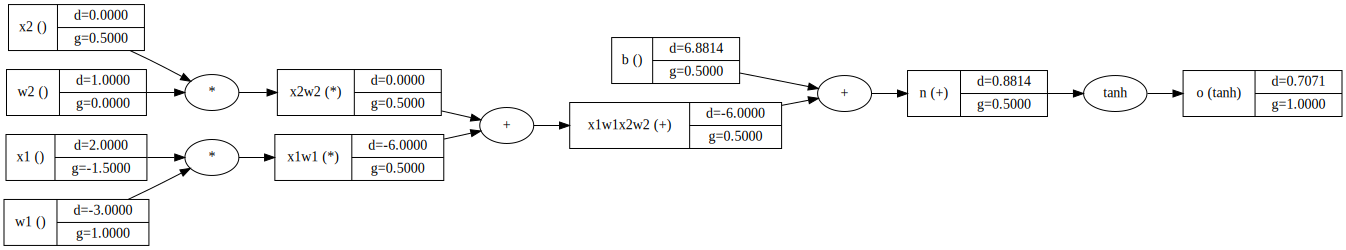

In [25]:
# Value(l=o d=0.7071, g=1.0000)
# Value(l=n d=0.8814, g=0.5000)
# Value(l=b d=6.8814, g=0.5000)
# Value(l=x1w1x2w2 d=-6.0000, g=0.5000)
# Value(l=x2w2 d=0.0000, g=0.5000)
# Value(l=w2 d=1.0000, g=0.0000)
# Value(l=x2 d=0.0000, g=0.5000)
# Value(l=x1w1 d=-6.0000, g=0.5000)
# Value(l=w1 d=-3.0000, g=1.0000)
# Value(l=x1 d=2.0000, g=-1.5000)
o.print_topo()

build_dot_graph(o)


Value(l=b d=6.0000, g=1.0000)
Value(l=a d=3.0000, g=2.0000)


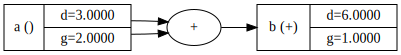

In [28]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()

# Value(l=b d=6.0000, g=1.0000)
# Value(l=a d=3.0000, g=2.0000)
b.print_topo()

assert a._grad == 2.0

build_dot_graph(b)

Value(l=f d=-6.0000, g=1.0000)
Value(l=e d=1.0000, g=-6.0000)
Value(l=d d=-6.0000, g=1.0000)
Value(l=b d=3.0000, g=-8.0000)
Value(l=a d=-2.0000, g=-3.0000)


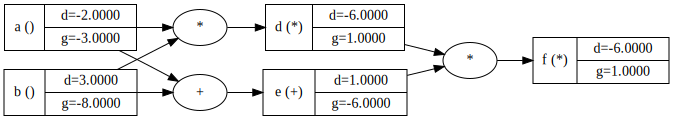

In [29]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()

f.print_topo()

assert a._grad == -3.0
assert b._grad == -8.0

build_dot_graph(f)